In [1183]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch import nn
import matplotlib.pyplot as plt

In [1184]:
df = pd.read_csv("NVIDIA2023.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,148.509995,149.960007,140.960007,143.149994,143.086502,40127700
1,2023-01-04,145.669998,148.529999,142.410004,147.490005,147.424591,43132400
2,2023-01-05,144.910004,145.639999,141.479996,142.649994,142.586716,38916800
3,2023-01-06,144.740005,150.100006,140.339996,148.589996,148.524094,40504400
4,2023-01-09,152.839996,160.559998,151.410004,156.279999,156.210693,50423100


In [1185]:
df['Days'] = range(1, len(df.index)+1)
df

,Date,Open,High,Low,Close,Adj Close,Volume,Days
0,2023-01-03,148.509995,149.960007,140.960007,143.149994,143.086502,40127700,1
1,2023-01-04,145.669998,148.529999,142.410004,147.490005,147.424591,43132400,2
2,2023-01-05,144.910004,145.639999,141.479996,142.649994,142.586716,38916800,3
3,2023-01-06,144.740005,150.100006,140.339996,148.589996,148.524094,40504400,4
4,2023-01-09,152.839996,160.559998,151.410004,156.279999,156.210693,50423100,5
...,...,...,...,...,...,...,...,...
270,2024-01-31,614.400024,622.690002,607.000000,615.270020,615.270020,45379500,271
271,2024-02-01,621.000000,631.909973,616.500000,630.270020,630.270020,36914600,272
272,2024-02-02,639.739990,666.000000,636.900024,661.599976,661.599976,47578000,273
273,2024-02-05,682.250000,694.969971,672.049988,693.320007,693.320007,68007800,274


In [1187]:
device = 'mps' if torch.backends.mps.is_available() else 'cpu'
device

'mps'

In [1186]:
class StockPrediction(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.layer1 = nn.Linear(in_features=1, out_features=200)
        self.layer2 = nn.Linear(in_features=200, out_features=200)
        self.layer3 = nn.Linear(in_features=200, out_features=200)
        self.layer4 = nn.Linear(in_features=200, out_features=200)
        self.layer5 = nn.Linear(in_features=200, out_features=1)
        
        
        
    def forward(self, x):
        return self.layer5(self.layer4(self.layer3(self.layer2((self.layer1(x))))))

In [1203]:
model = StockPrediction().to(device)

In [1204]:
# 挑選數據
X = torch.tensor(df['Days'].iloc[100:].values)
y = torch.tensor(df['Close'].iloc[100:].values)


In [1205]:
Xtrain, Xtest, yTrain, yTest = train_test_split(X, y, test_size=0.2)

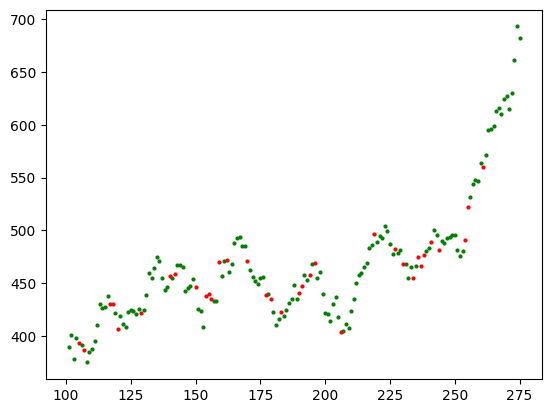

In [1191]:

plt.scatter(Xtrain, yTrain, c='g', s=4)
plt.scatter(Xtest, yTest, c='r', s=4)

In [1192]:
lossFn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.0005)

In [1206]:
Xtrain = Xtrain.float().to(device).unsqueeze(dim=1)
Xtest = Xtest.float().to(device).unsqueeze(dim=1)
yTrain = yTrain.float().to(device)
yTest = yTest.float().to(device)


In [1194]:
torch.manual_seed(42)
torch.mps.manual_seed(42)
epochs = 30000

for epoch in range(epochs):
    model.train()
    y_pred = model(Xtrain).unsqueeze(dim=1)
    loss = lossFn(y_pred, yTrain)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model.eval()
    with torch.inference_mode():
        testPred = model(Xtest).unsqueeze(dim=1)
        testLoss = lossFn(testPred, yTest)
        
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss {loss} TestLoss {testLoss}")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([140])) that is different to the input size (torch.Size([140, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([35])) that is different to the input size (torch.Size([35, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch 0: Loss 440.0293273925781 TestLoss 235.62130737304688
Epoch 100: Loss 190.89759826660156 TestLoss 325.58148193359375
Epoch 200: Loss 187.83349609375 TestLoss 317.9913635253906
Epoch 300: Loss 156.16024780273438 TestLoss 268.89483642578125
Epoch 400: Loss 121.43959045410156 TestLoss 145.35682678222656
Epoch 500: Loss 208.52345275878906 TestLoss 258.33709716796875
Epoch 600: Loss 171.15293884277344 TestLoss 328.7871398925781
Epoch 700: Loss 326.3791198730469 TestLoss 161.01316833496094
Epoch 800: Loss 352.50750732421875 TestLoss 233.31101989746094
Epoch 900: Loss 142.56785583496094 TestLoss 211.99351501464844
Epoch 1000: Loss 247.97918701171875 TestLoss 118.49641418457031
Epoch 1100: Loss 181.40536499023438 TestLoss 260.15606689453125
Epoch 1200: Loss 317.6683654785156 TestLoss 165.34083557128906
Epoch 1300: Loss 124.4156494140625 TestLoss 136.9008026123047
Epoch 1400: Loss 148.55958557128906 TestLoss 191.28622436523438
Epoch 1500: Loss 211.54556274414062 TestLoss 254.3330078125
Ep

In [1207]:
predDays = torch.arange(275, 300).to(device).float()
predDays = predDays.unsqueeze(1)
with torch.no_grad():
    y_pred = model(predDays)

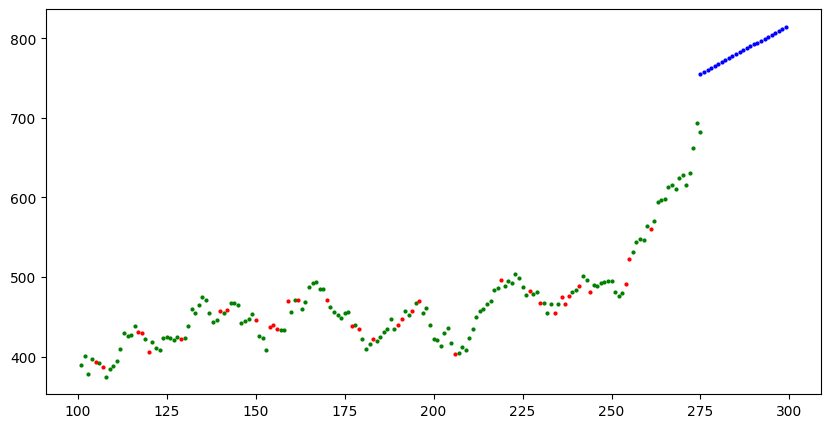

In [1196]:
Xtrain = Xtrain.cpu().numpy()
yTrain = yTrain.cpu().numpy()
Xtest = Xtest.cpu().numpy()
yTest = yTest.cpu().numpy()
predDays = predDays.cpu().numpy()
y_pred = y_pred.detach().cpu().numpy()

plt.figure(figsize=(10,5))
plt.scatter(Xtrain, yTrain, c='g', s=4)
plt.scatter(Xtest, yTest, c='r', s=4)
plt.scatter(predDays, y_pred, color='b', s=4)


In [1197]:
y_pred = y_pred.squeeze()

In [1209]:


# Create a DataFrame with a single date
new = pd.DataFrame({'date': ['2024-02-06']})

# Convert the 'date' column to datetime format
new['date'] = pd.to_datetime(new['date'])

# Calculate the date 59 days later
new['date_plus_59'] = new['date'] + pd.Timedelta(days=24)

# Create a date range that includes every day between the original date and the date 59 days later
date_range = pd.date_range(start=new['date'].iloc[0], end=new['date_plus_59'].iloc[0])

# Convert the date range to a DataFrame
date_df = pd.DataFrame(date_range, columns=['date'])

date_df['prediction'] = y_pred.tolist()

date_df


,date,prediction
0,2024-02-06,[43.00372314453125]
1,2024-02-07,[43.16039276123047]
2,2024-02-08,[43.317047119140625]
3,2024-02-09,[43.47370529174805]
4,2024-02-10,[43.63037109375]
5,2024-02-11,[43.78702163696289]
6,2024-02-12,[43.94367980957031]
7,2024-02-13,[44.100364685058594]
8,2024-02-14,[44.25700759887695]
9,2024-02-15,[44.413692474365234]


In [1199]:
current = pd.read_csv('NVDA.csv')
current = current.loc[:, ['Date', 'Close']]
current = current.loc[(current['Date'] > '2024-02-05') & (current['Date'] < '2024-03-02')]
current['Date'] = pd.to_datetime(current['Date'])
current['Date'] = current['Date'].dt.strftime('%m/%d')

date_df['date'] = pd.to_datetime(date_df['date'])
date_df['date'] = date_df['date'].dt.strftime('%m/%d')


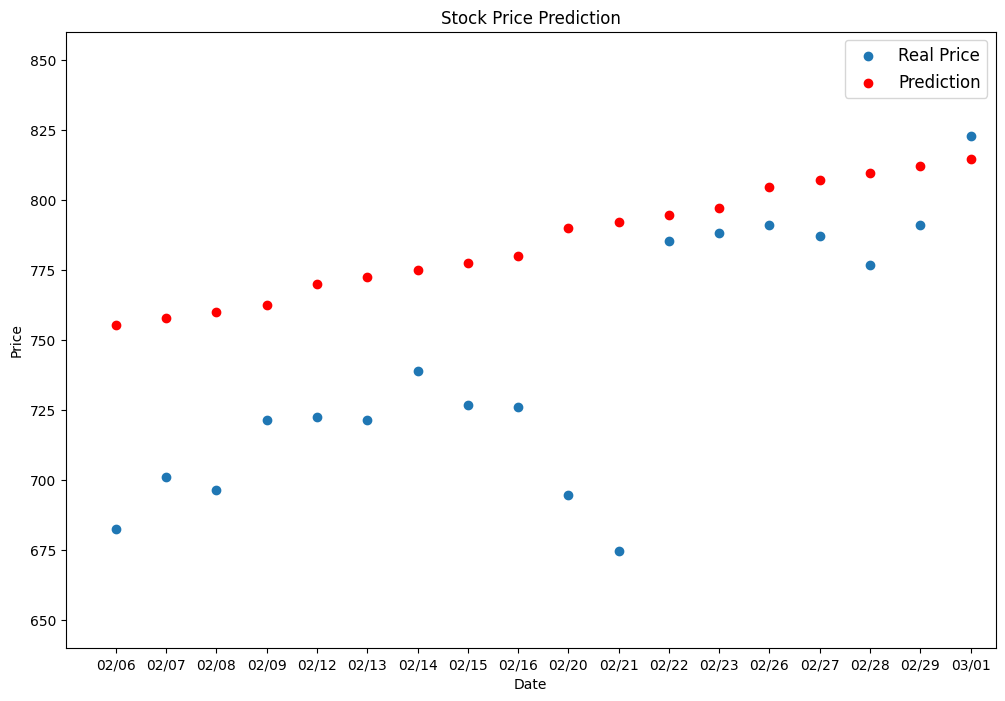

In [1200]:
plt.figure(figsize=(12, 8))
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')

plt.xlim(-1, len(current['Date']) - 0.5)
plt.ylim(640, 860)
plt.scatter(current['Date'], current['Close'], label='Real Price')
plt.scatter(date_df['date'], date_df['prediction'], color='r', label='Prediction')
plt.legend(fontsize=12)


In [1201]:
date_df

,date,prediction
0,02/06,755.112854
1,02/07,757.586182
2,02/08,760.059692
3,02/09,762.533325
4,02/10,765.006775
5,02/11,767.480286
6,02/12,769.953918
7,02/13,772.427368
8,02/14,774.900879
9,02/15,777.374390


In [1202]:
current

,Date,Close
213,02/06,682.229980
214,02/07,700.989990
215,02/08,696.409973
216,02/09,721.330017
217,02/12,722.479980
218,02/13,721.280029
219,02/14,739.000000
220,02/15,726.580017
221,02/16,726.130005
222,02/20,694.520020
